In [68]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
plt.style.use('ggplot')

# step_1, load data
# 設定 data_path
dir_data = './data/'

In [32]:
# 讀取資料檔
f_sklearn_train = os.path.join(dir_data, 'train.csv')
f_sklearn_test = os.path.join(dir_data, 'test.csv')
f_sklearn_trainLabel = os.path.join(dir_data, 'trainLabels.csv')
sklearn_train = pd.read_csv(f_sklearn_train, header=None)
sklearn_test = pd.read_csv(f_sklearn_test, header=None)
sklearn_trainLabel = pd.read_csv(f_sklearn_trainLabel, header=None)
sklearn_trainLabel.columns = ["y"]

In [29]:
print("shape of sklearn_train:{}".format(sklearn_train.shape))
print("shape of sklearn_test:{}".format(sklearn_test.shape))
print("shape of sklearn_trainLabel:{}".format(sklearn_trainLabel.shape))

shape of sklearn_train:(1000, 40)
shape of sklearn_test:(9000, 40)
shape of sklearn_trainLabel:(1000, 1)


In [34]:
sklearn_train.dtypes # 確認所有資料類型皆為數值

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
dtype: object

In [35]:
# 檢查每個欄位的nunique
for col in sklearn_train.columns:
    print("nunique of column  {}: {}".format(col, sklearn_train[col].nunique()))

nunique of column  0: 1000
nunique of column  1: 1000
nunique of column  2: 1000
nunique of column  3: 1000
nunique of column  4: 1000
nunique of column  5: 1000
nunique of column  6: 1000
nunique of column  7: 1000
nunique of column  8: 1000
nunique of column  9: 1000
nunique of column  10: 1000
nunique of column  11: 1000
nunique of column  12: 1000
nunique of column  13: 1000
nunique of column  14: 1000
nunique of column  15: 1000
nunique of column  16: 1000
nunique of column  17: 1000
nunique of column  18: 1000
nunique of column  19: 1000
nunique of column  20: 1000
nunique of column  21: 1000
nunique of column  22: 1000
nunique of column  23: 1000
nunique of column  24: 1000
nunique of column  25: 1000
nunique of column  26: 1000
nunique of column  27: 1000
nunique of column  28: 1000
nunique of column  29: 1000
nunique of column  30: 1000
nunique of column  31: 1000
nunique of column  32: 1000
nunique of column  33: 1000
nunique of column  34: 1000
nunique of column  35: 1000
nu

In [36]:
# 檢查是否有nan值
sklearn_train.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

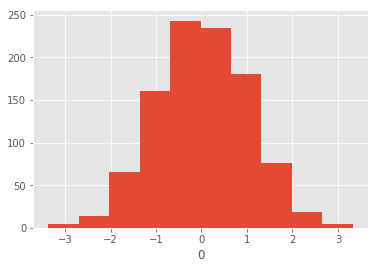

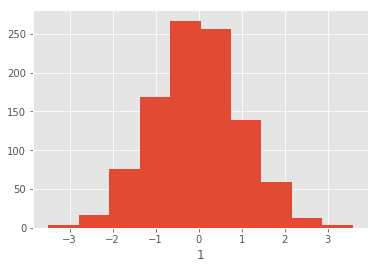

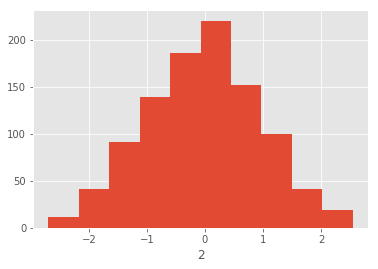

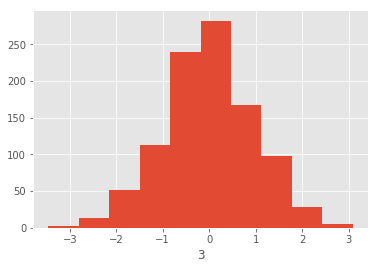

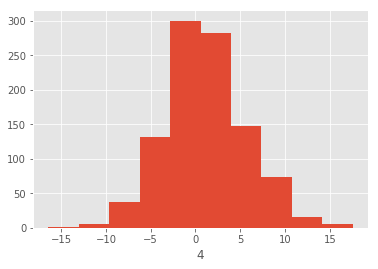

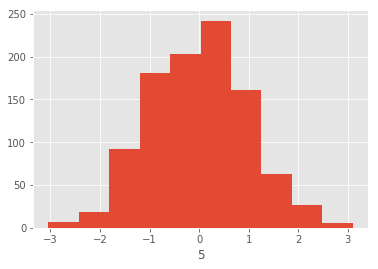

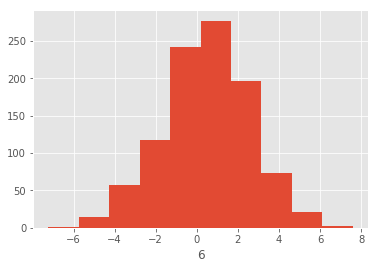

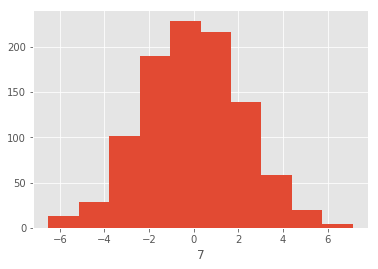

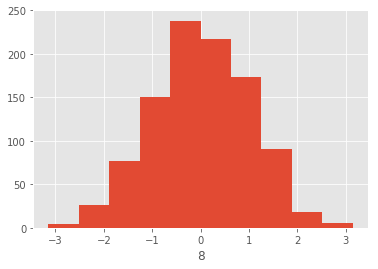

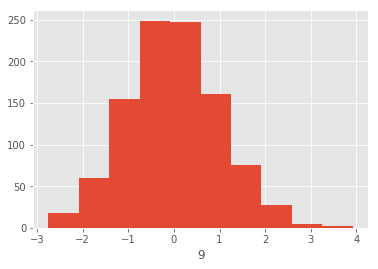

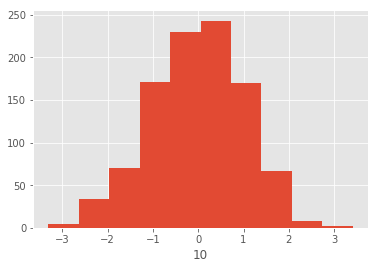

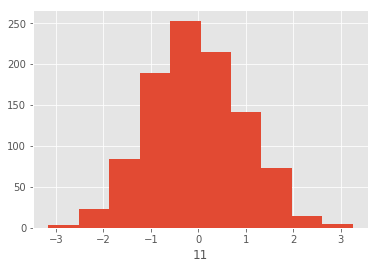

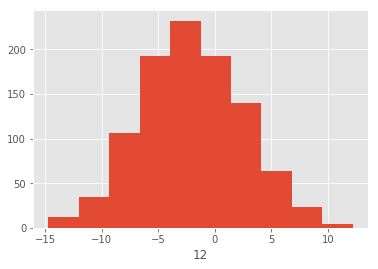

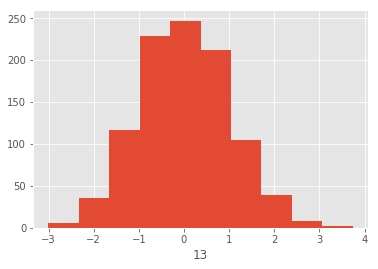

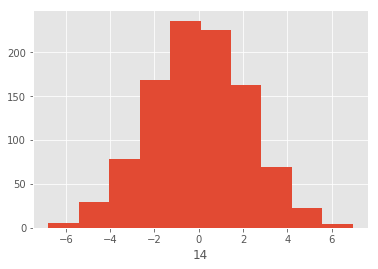

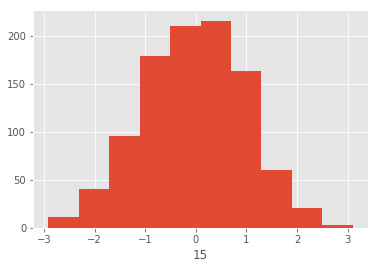

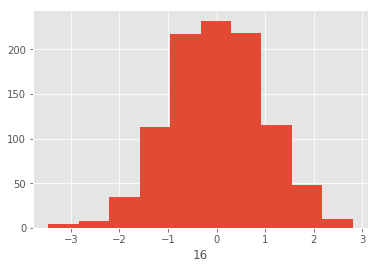

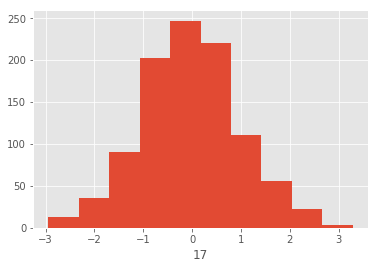

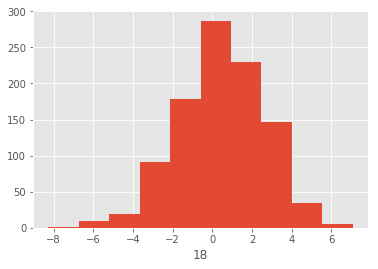

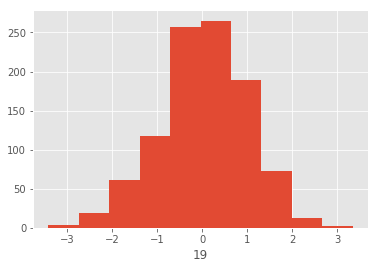

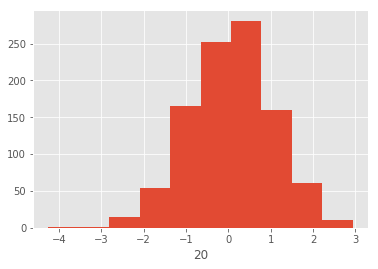

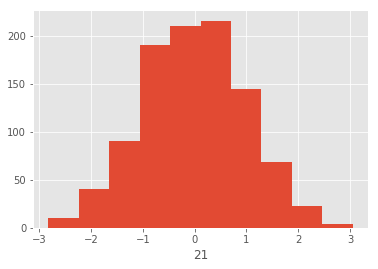

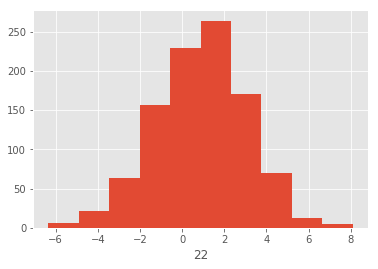

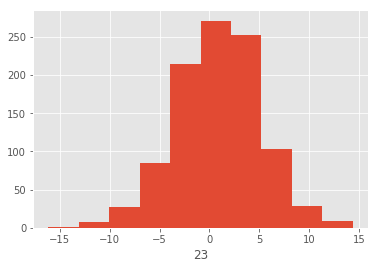

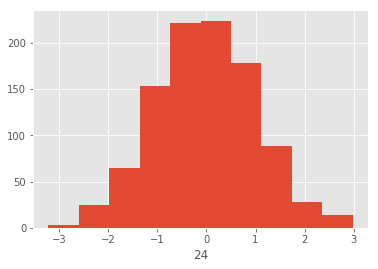

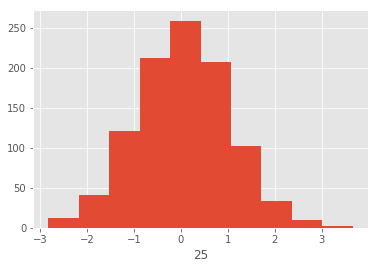

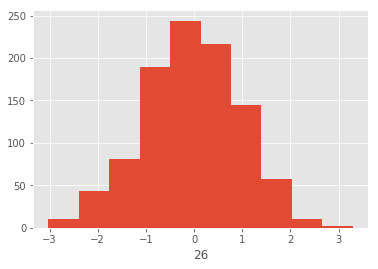

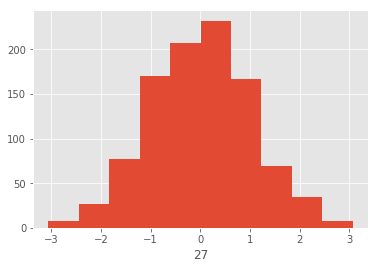

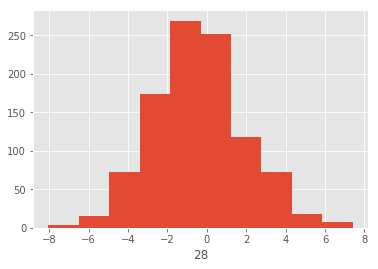

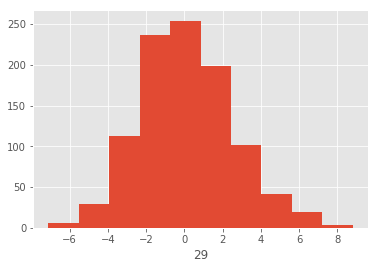

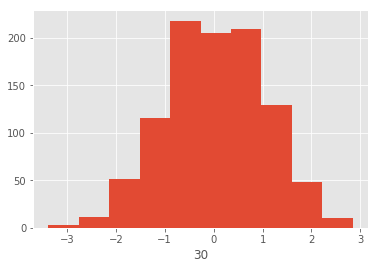

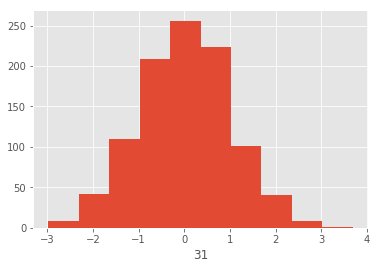

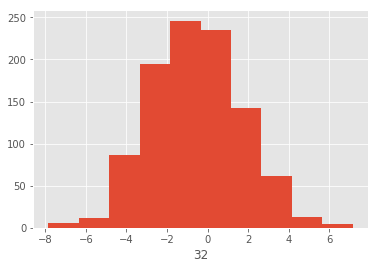

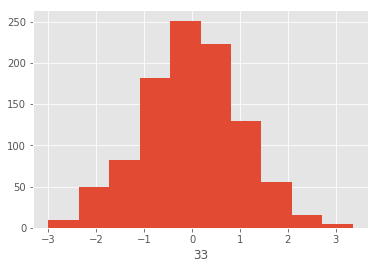

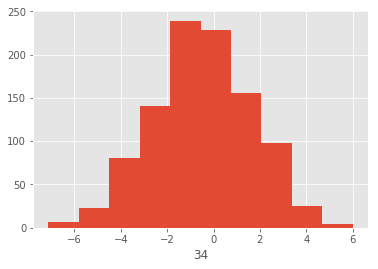

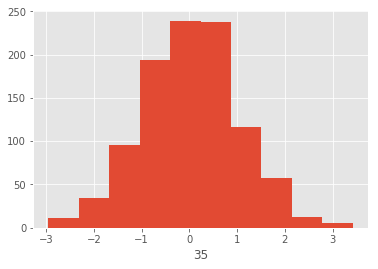

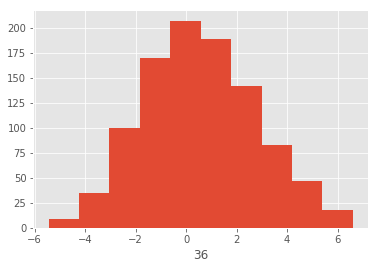

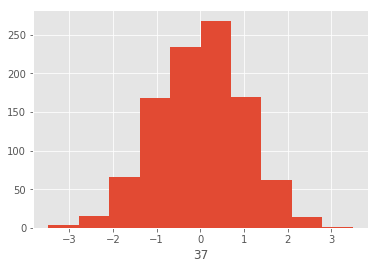

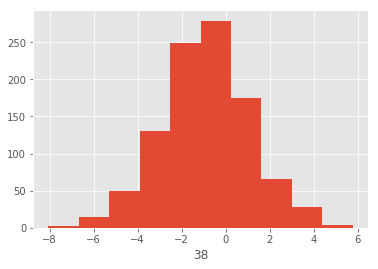

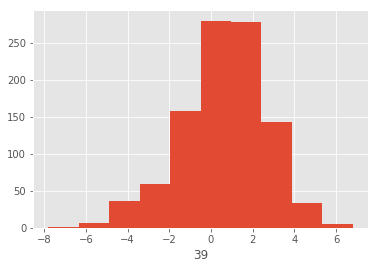

In [37]:
# 觀察每個feature的分布
for col in sklearn_train.columns:
    plt.xlabel("{}".format(col))
    sklearn_train[col].hist()
    plt.show()

In [38]:
# 檢查相關性
sklearn_train_corr = pd.concat([sklearn_train, sklearn_trainLabel], axis=1)
sklearn_train_corr = sklearn_train_corr.corr()['y'].reset_index()

sklearn_train_corr.columns = ["column_name", "corr"]
sklearn_train_corr = sklearn_train_corr.sort_values("corr", ascending=False)

sklearn_train_corr

,column_name,corr
40,y,1.000000
14,14,0.476171
12,12,0.460738
18,18,0.289508
39,39,0.264656
34,34,0.236116
28,28,0.207949
23,23,0.172938
4,4,0.150652
26,26,0.064633


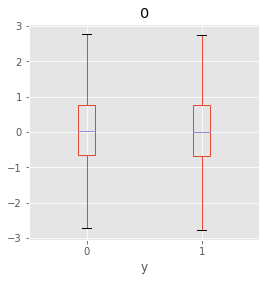

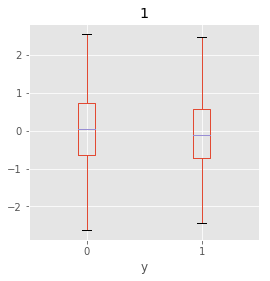

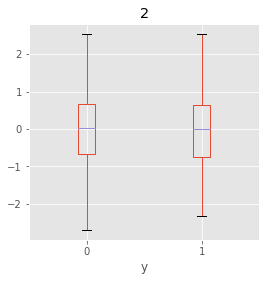

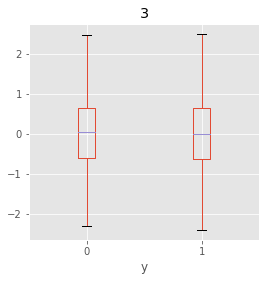

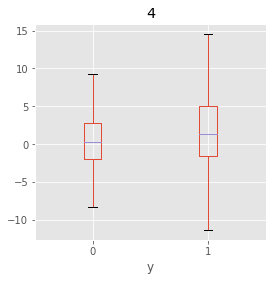

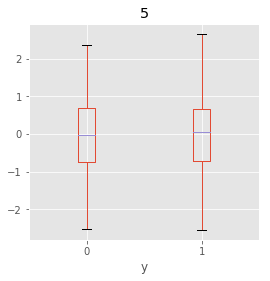

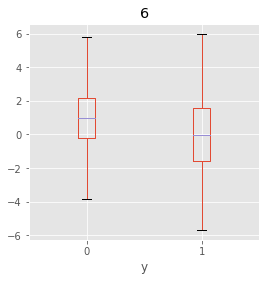

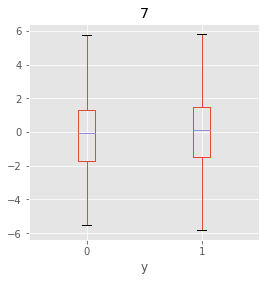

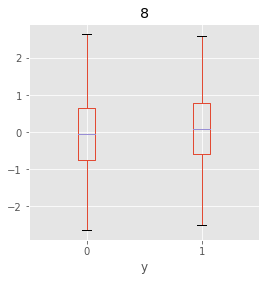

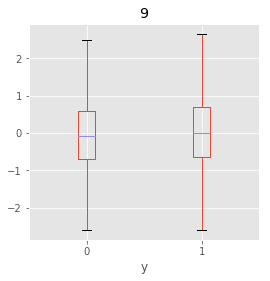

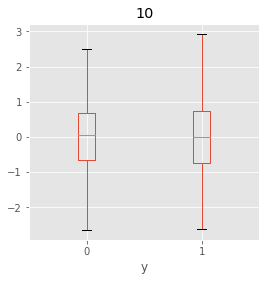

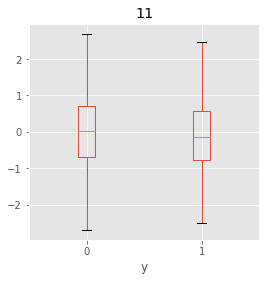

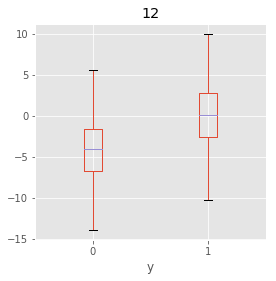

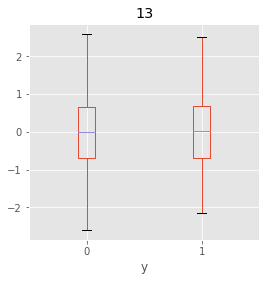

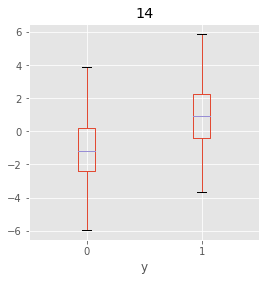

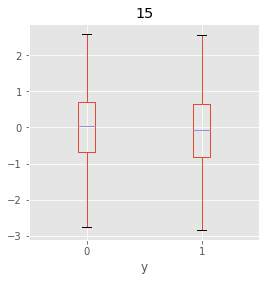

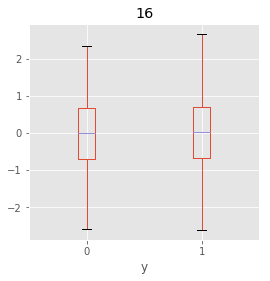

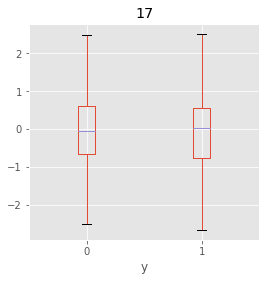

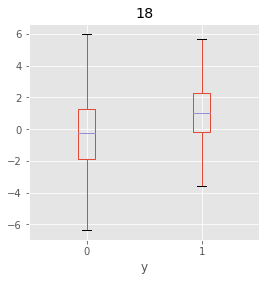

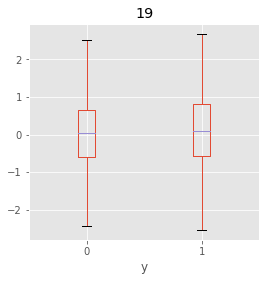

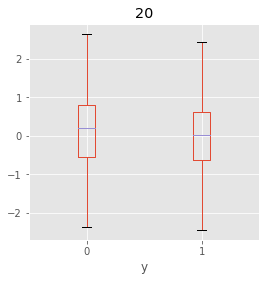

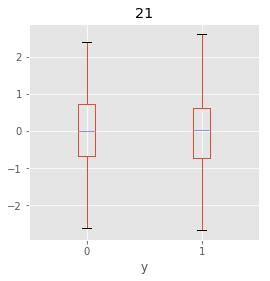

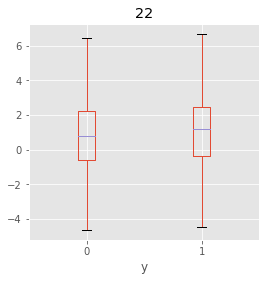

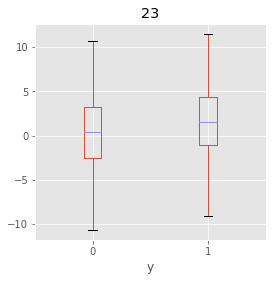

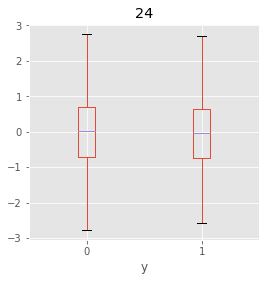

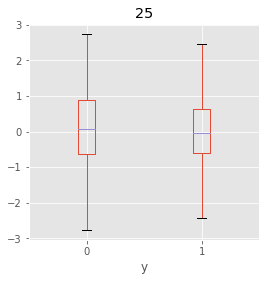

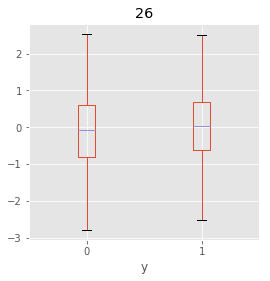

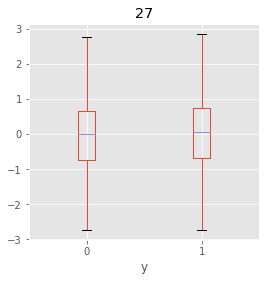

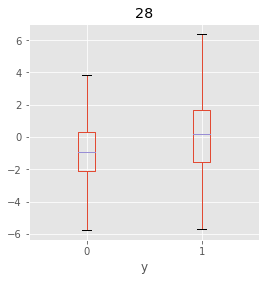

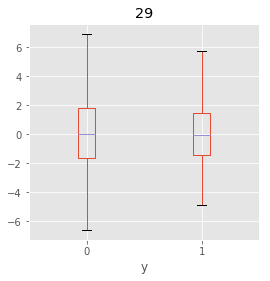

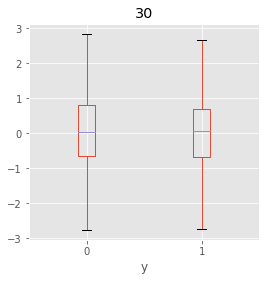

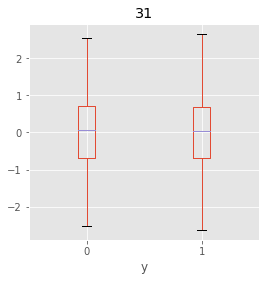

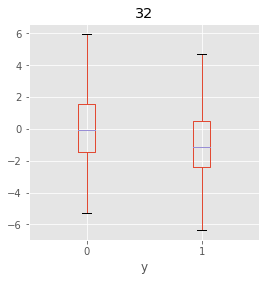

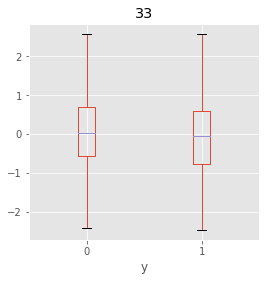

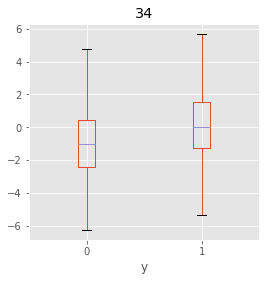

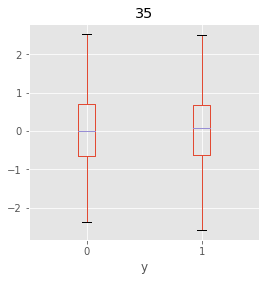

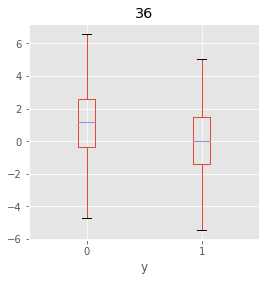

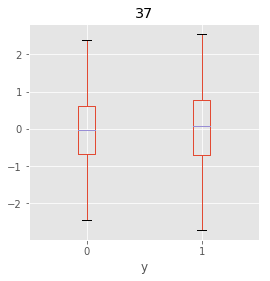

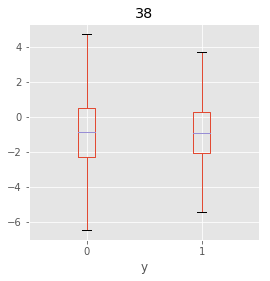

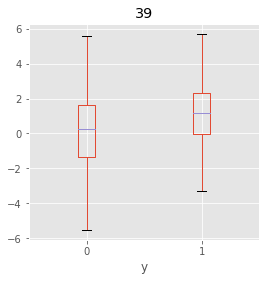

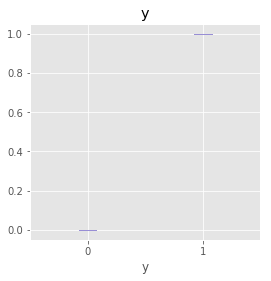

In [39]:
# 觀察每個數值的箱型圖分布 (以目標值去groupby)
sklearn_train_boxplot = pd.concat([sklearn_train, sklearn_trainLabel], axis=1)
for col in sklearn_train_boxplot.columns:
    sklearn_train_boxplot.boxplot(column=col, by = "y", showfliers = False, figsize=(4,4))
    plt.suptitle('')
    plt.show()

In [41]:
# 使用LogisticRegression當作base model
# 0.82
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, sklearn_train, sklearn_trainLabel["y"], cv=5).mean()

0.82

In [43]:
# 使用標準化的方式_StandardScaler
# 0.82
sklearn_train_standard = StandardScaler().fit_transform(sklearn_train)
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, sklearn_train_standard, sklearn_trainLabel["y"], cv=5).mean()

0.82

In [44]:
# 使用標準化的方式_MinMaxScaler
# 0.82
sklearn_train_minmax = MinMaxScaler().fit_transform(sklearn_train)
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, sklearn_train_minmax, sklearn_trainLabel["y"], cv=5).mean()

0.821

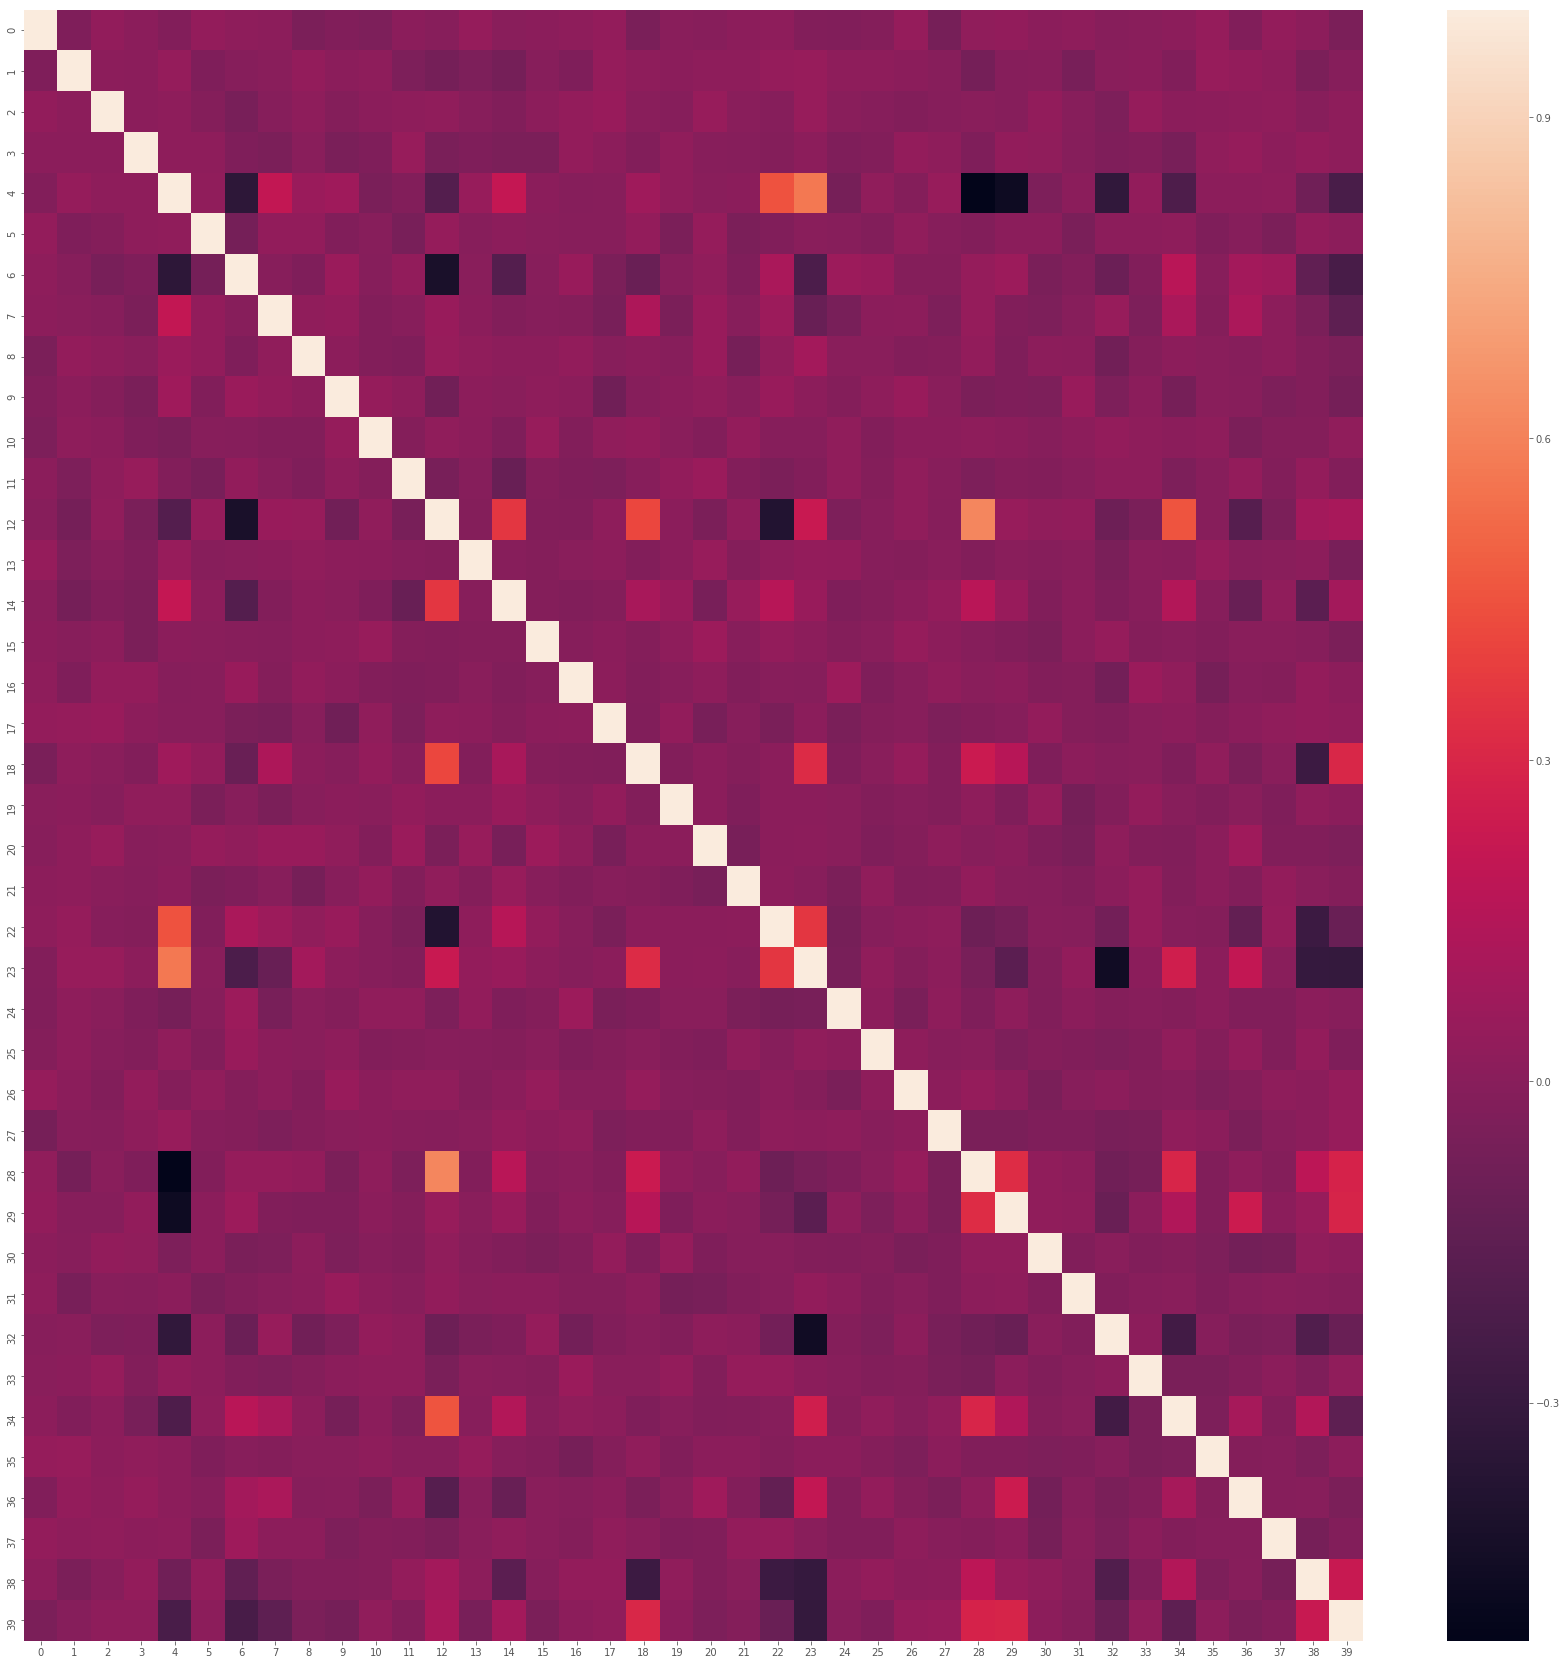

In [45]:
# draw heatmap
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(sklearn_train.corr())
plt.show()

In [ ]:
# 繪製pairgrid
# grid = sns.PairGrid(data = sklearn_train_boxplot, size = 3, diag_sharey=False, 
#                     hue = '1', vars = [x for x in list(sklearn_train_boxplot.columns) if x != '1'])
# """
# Your Code Here
# Please replace "..." to correct plot function
# """
# grid.map_upper(plt.scatter , alpha = 0.2)
# grid.map_diag(plt.hist)
# grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

# plt.show()

In [59]:
# 嘗試只用較高相關係數的feature去訓練
# 0.8219999999999998
"""
high_corr
[14, 12, 18, 39, 34, 28, 23, 4, 32, 36, 6]
"""
high_corr = list(sklearn_train_corr.loc[(sklearn_train_corr["corr"]>0.1) | (sklearn_train_corr["corr"]<-0.1), :].column_name)
high_corr.remove("y")
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, sklearn_train[high_corr], sklearn_trainLabel["y"], cv=5).mean()

0.8219999999999998

In [60]:
# 移除high_corr 彼此相關度較高的feature
# 0.8210000000000001 但表現沒有比較好
for col in sklearn_train[high_corr].corr().columns:
    if len(list(sklearn_train[high_corr].corr().loc[(sklearn_train[high_corr].corr()[col] > 0.5), col].index)) != 1:
            print("corr bigger than 0.5 of {} :\n{}\n".format(col,
                                                  list(sklearn_train[high_corr].corr().loc[(sklearn_train[high_corr].corr()[col] > 0.5),
                                                                                                col].index)))       
high_corr.remove(12)
high_corr.remove(23)
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, sklearn_train[high_corr], sklearn_trainLabel["y"], cv=5).mean()

corr bigger than 0.5 of 12 :
[12, 28]

corr bigger than 0.5 of 28 :
[12, 28]

corr bigger than 0.5 of 23 :
[23, 4]

corr bigger than 0.5 of 4 :
[23, 4]



0.8210000000000001

In [61]:
# 進行qcut劃分嘗試增加新特徵
labels = [1, 2, 3, 4, 5, 6]
customize_high_corr = list()
for col in sklearn_train[high_corr].columns:
    sklearn_train["customize_{}".format(col)] = pd.qcut(sklearn_train[col], 6, labels=labels)
    customize_high_corr.append("customize_{}".format(col))

# u = np.random.rand(100)
# df  = pd.DataFrame(data=u, columns=["u"])
# labels = [1, 2, 3, 4, 5, 6]

In [62]:
# 加了cut後的新特徵表現沒有比較好
# 0.8160000000000001
estimator = LogisticRegression()
cross_val_score(estimator, sklearn_train[high_corr + customize_high_corr], sklearn_trainLabel["y"], cv=5).mean()

C:\Users\Dick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8160000000000001

In [63]:
# GradientBoostingClassifier
# 只用customize_high_corr的表現最好
gbdt = GradientBoostingClassifier()
print("score (high_corr + customize_high_corr):{}".format(cross_val_score(gbdt, sklearn_train[high_corr + customize_high_corr],
                                                                          sklearn_trainLabel["y"], cv=5).mean()))
print("score (high_corr):{}".format(cross_val_score(gbdt, sklearn_train[high_corr],
                                                    sklearn_trainLabel["y"], cv=5).mean()))
print("score (customize_high_corr):{}".format(cross_val_score(gbdt, sklearn_train[customize_high_corr],
                                                              sklearn_trainLabel["y"], cv=5).mean()))
sklearn_train_orig = sklearn_train.drop(customize_high_corr, axis=1)
print("score (all_feature):{}".format(cross_val_score(gbdt, sklearn_train_orig,
                                                      sklearn_trainLabel["y"], cv=5).mean()))

"""
score (high_corr + customize_high_corr):0.8688492462311558
score (high_corr):0.8688492462311558
score (customize_high_corr):0.8828743718592964
score (all_feature):0.8708291457286433
"""

score (high_corr + customize_high_corr):0.865
score (high_corr):0.865
score (customize_high_corr):0.881
score (all_feature):0.8619999999999999


'\nscore (high_corr + customize_high_corr):0.8688492462311558\nscore (high_corr):0.8688492462311558\nscore (customize_high_corr):0.8828743718592964\nscore (all_feature):0.8708291457286433\n'

In [64]:
high_corr

[14, 18, 39, 34, 28, 4, 32, 36, 6]

In [65]:
list(sklearn_test.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [70]:
for col in sklearn_test[high_corr].columns:
    labels = [1, 2, 3, 4, 5, 6]
    sklearn_test["customize_{}".format(col)] = pd.qcut(sklearn_test[col], 6, labels=labels)
gbdt.fit(sklearn_train[customize_high_corr], sklearn_trainLabel["y"])
y_pred = gbdt.predict(sklearn_test[customize_high_corr])

In [73]:
sklearn_testLabel = pd.DataFrame(data=y_pred, columns=["Solution"])

In [81]:
sklearn_testLabel["Id"] = (sklearn_testLabel.index) + 1

In [82]:
sklearn_testLabel.to_csv("Day_048_HW.csv", index=False)